In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
data = pd.read_csv('../../data/final_clean_data.csv')

In [9]:
def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    Imports:
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    import numpy as np
    import matplotlib.pyplot as plt
    
    Takes in training and testing data from a train_test_split function.
    Prints an evaluation of r-square value with mean absolute error and mean squared error.
    Visualizes residuals with y-values.
    Returns training predictions, test predictions, and coeffeciants.
    
    log=True : logs the predictions
    '''
    #grab predictions
#     model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
#     summary = model.summary()
    
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    tr_preds = lr.predict(X_tr) 
    te_preds = lr.predict(X_te)
    
    print('\n')
    
    #Evaluate
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    #Visualize
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    
    #getting coeff
#     print(summary)
    
    return tr_preds, te_preds, lr.coef_

## Working on final model

## FSM

In [5]:
data = data.drop(columns='Unnamed: 0')

In [6]:
data.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.0,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316


<AxesSubplot:>

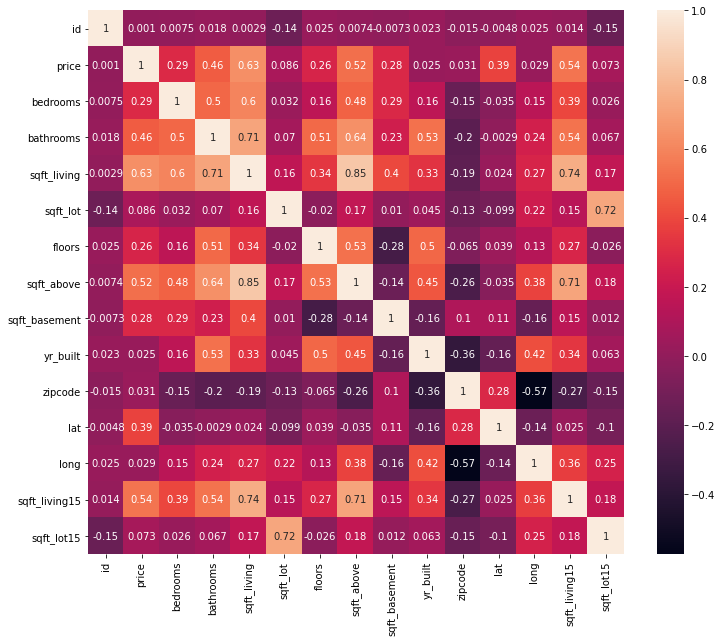

In [7]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

In [8]:
X = data['sqft_living']
y = data['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:34:13   Log-Likelihood:            -2.6393e+05
No. Observations:               19389   AIC:                         5.279e+05
Df Residuals:                   19387   BIC:                         5.279e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.147e+04   3883.289     20.979      0.000    7.39e+04    8.91e+04
sqft_living   205.0471      1.800    113.911      0.000     201.519     208.575
==============================================================================
Omnibus:                    10168.885   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173507.083
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      17.022   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple

In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


In [97]:
rel = data[['sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'bedrooms', 'bathrooms', 'sqft_basement']]

<AxesSubplot:>

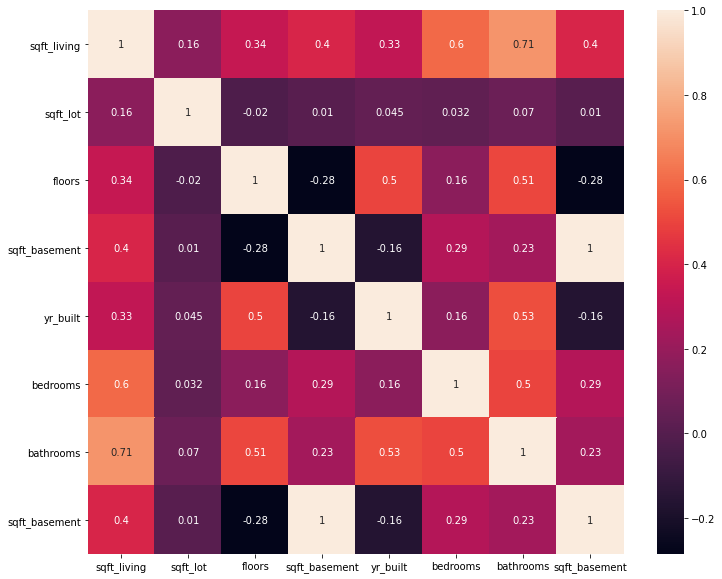

In [98]:
plt.subplots(figsize=(12, 10))
sns.heatmap(rel.corr(), annot=True)

In [47]:
rel_data1 = data[['sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition', 'grade']]

#'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition', 'grade'

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(rel_data1, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

cat_cols = ['grade', 'condition']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train1)
X_train_enc1 = ct.transform(X_train1)
X_test_enc1 = ct.transform(X_test1)

scaler = StandardScaler()

scaler.fit(X_train_enc1)

X_train_scaled1 = scaler.transform(X_train_enc1)
X_test_scaled1 = scaler.transform(X_test_enc1)



Train R2 Score: 0.5641
Train MAE Score: $117333.8091
Train RMSE Score: $167772.3456
********************
Test R2 Score: 0.5615
Test MAE Score: $117186.3063
Test RMSE Score: $170432.3723
********************


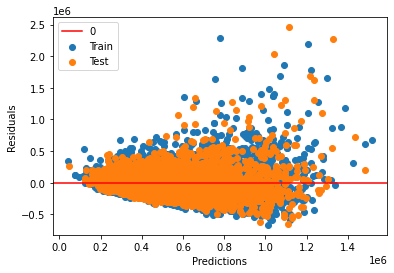

(array([346461.25940119, 463407.41040915, 575633.23511059, ...,
        501385.91001725, 356014.72167551, 765659.33078364]),
 array([411671.41591043, 309932.12856632, 350572.5518849 , ...,
        344229.49505395, 297619.06574021, 468387.1979142 ]),
 array([-153828.39683972, -211702.96651767, -146857.95936852,
         -59310.63281989,   -2447.01650354,    1839.25193321,
          -2326.8752528 ,   14295.60916323,   95924.39800548,
          -1397.56779584,   25664.03492477,  -85803.14771349]))

In [50]:
evaluate_model(X_train_scaled1, X_test_scaled1, y_train1, y_test1)

In [75]:
data_lessmill = data[data['price'] < 1500000]

In [76]:
less_mill_dat = data_lessmill[['sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition', 'grade']]

In [77]:
less_mill_dat.head()

,sqft_living,sqft_lot,floors,yr_built,condition,grade
0,2400,9373,2.0,1991,Average,7 Average
1,2060,26036,1.0,1947,Good,8 Good
2,1460,43000,1.0,1952,Average,7 Average
3,1430,7599,1.5,1930,Good,6 Low Average
4,1650,3504,1.0,1951,Average,7 Average


In [78]:
data_lessmill.shape

(19251, 18)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(less_mill_dat, data_lessmill['price'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [80]:

cat_cols = ['grade', 'condition']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

scaler = StandardScaler()

scaler.fit(X_train_enc)

X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)



Train R2 Score: 0.5761
Train MAE Score: $109911.3556
Train RMSE Score: $144580.4828
********************
Test R2 Score: 0.5787
Test MAE Score: $108775.9480
Test RMSE Score: $143635.1909
********************


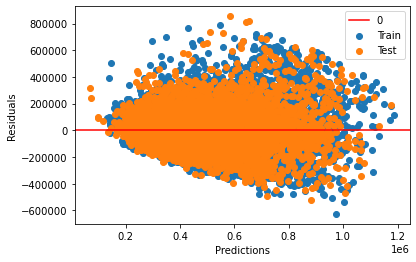

(array([863180.6285363 , 391674.24471446, 538724.1324954 , ...,
        267380.15637229, 349121.05665741, 268934.0652335 ]),
 array([440045.69167673, 368676.78123105, 660508.95998176, ...,
        218756.61127434, 323863.54157668, 366399.36256317]),
 array([-138308.11829321, -181676.07679966, -117933.64172576,
         -39578.66175455,   -4854.45739849,   -1186.50199184,
          -2924.65122458,   11838.09989474,   79528.22725572,
           1512.55823716,   24431.32524841,  -79410.41601022]))

In [81]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [93]:
rel_data2 = data[['sqft_living', 'yr_built', 'grade']]

In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(rel_data2, data['price'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [95]:

cat_cols = ['grade']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train2)
X_train_enc2 = ct.transform(X_train2)
X_test_enc2 = ct.transform(X_test2)

scaler = StandardScaler()

scaler.fit(X_train_enc2)

X_train_scaled2 = scaler.transform(X_train_enc2)
X_test_scaled2 = scaler.transform(X_test_enc2)



Train R2 Score: 0.5544
Train MAE Score: $119093.9387
Train RMSE Score: $169641.3907
********************
Test R2 Score: 0.5476
Test MAE Score: $119630.9062
Test RMSE Score: $173101.4547
********************


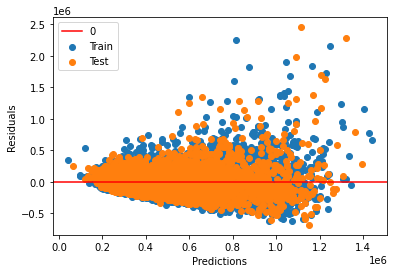

(array([317970.10206868, 470883.85502451, 540887.9875523 , ...,
        469601.44269577, 319608.58173997, 754378.80524504]),
 array([401898.46772148, 265180.04057943, 327561.34026043, ...,
        355918.08826537, 297975.07393417, 436793.33850659]),
 array([-158432.22134637, -218185.89555047, -147527.77577548,
         -58647.57746635,   98367.90850749,  -80581.57954119]))

In [96]:
evaluate_model(X_train_scaled2, X_test_scaled2, y_train2, y_test2)

In [100]:
rel = data[['sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'bedrooms', 'bathrooms', 'sqft_basement', 'condition', 'grade']]

In [101]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(rel, data['price'], 
                                                    test_size=0.33, 
                                                    random_state=42)

cat_cols = ['grade', 'condition']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train3)
X_train_enc3 = ct.transform(X_train3)
X_test_enc3 = ct.transform(X_test3)

scaler = StandardScaler()

scaler.fit(X_train_enc3)

X_train_scaled3 = scaler.transform(X_train_enc3)
X_test_scaled3 = scaler.transform(X_test_enc3)



Train R2 Score: 0.5766
Train MAE Score: $115411.8893
Train RMSE Score: $165357.6068
********************
Test R2 Score: 0.5767
Test MAE Score: $115106.4465
Test RMSE Score: $167446.9850
********************


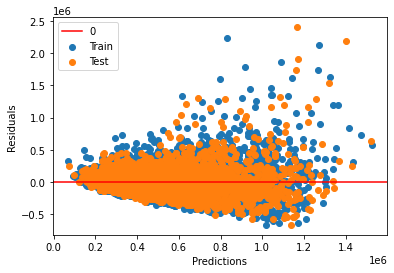

(array([370314.18081139, 514070.23004406, 595032.87094639, ...,
        448499.04121537, 317576.78802797, 734409.19238024]),
 array([403994.23616645, 333389.33437067, 380329.98677397, ...,
        315451.96040324, 234465.84703206, 443828.24532109]),
 array([-151097.87345275, -210116.50022224, -149108.581165  ,
         -58422.81912013,   -2104.81087979,    2051.94621008,
          -2167.39515952,   11752.28940038,   81969.84433903,
           -566.80827558,   28758.41085342,   10135.60286204,
         -89992.1741614 ,  -21309.36659818,   28321.20838742,
          10135.60286204]))

In [102]:
evaluate_model(X_train_scaled3, X_test_scaled3, y_train3, y_test3)